What are the most demanded skills for the top 3 most popular data roles?

Methodology

Clean up the job_skills column

Convert stringified lists to Python lists

Remove nulls and standardize skill names

Calculate skill counts by job_title_short

Explode the skills list

Group by role + skill

Count how often each skill appears

Calculate skill percentage

% of job postings for each role that require each skill

Helps compare roles fairly despite different posting volumes

Plot final findings

Bar charts (top 5 skills per role)

Sort by skill frequency or percentage

Top 3 roles: ['Data Analyst', 'Data Engineer', 'Data Scientist']


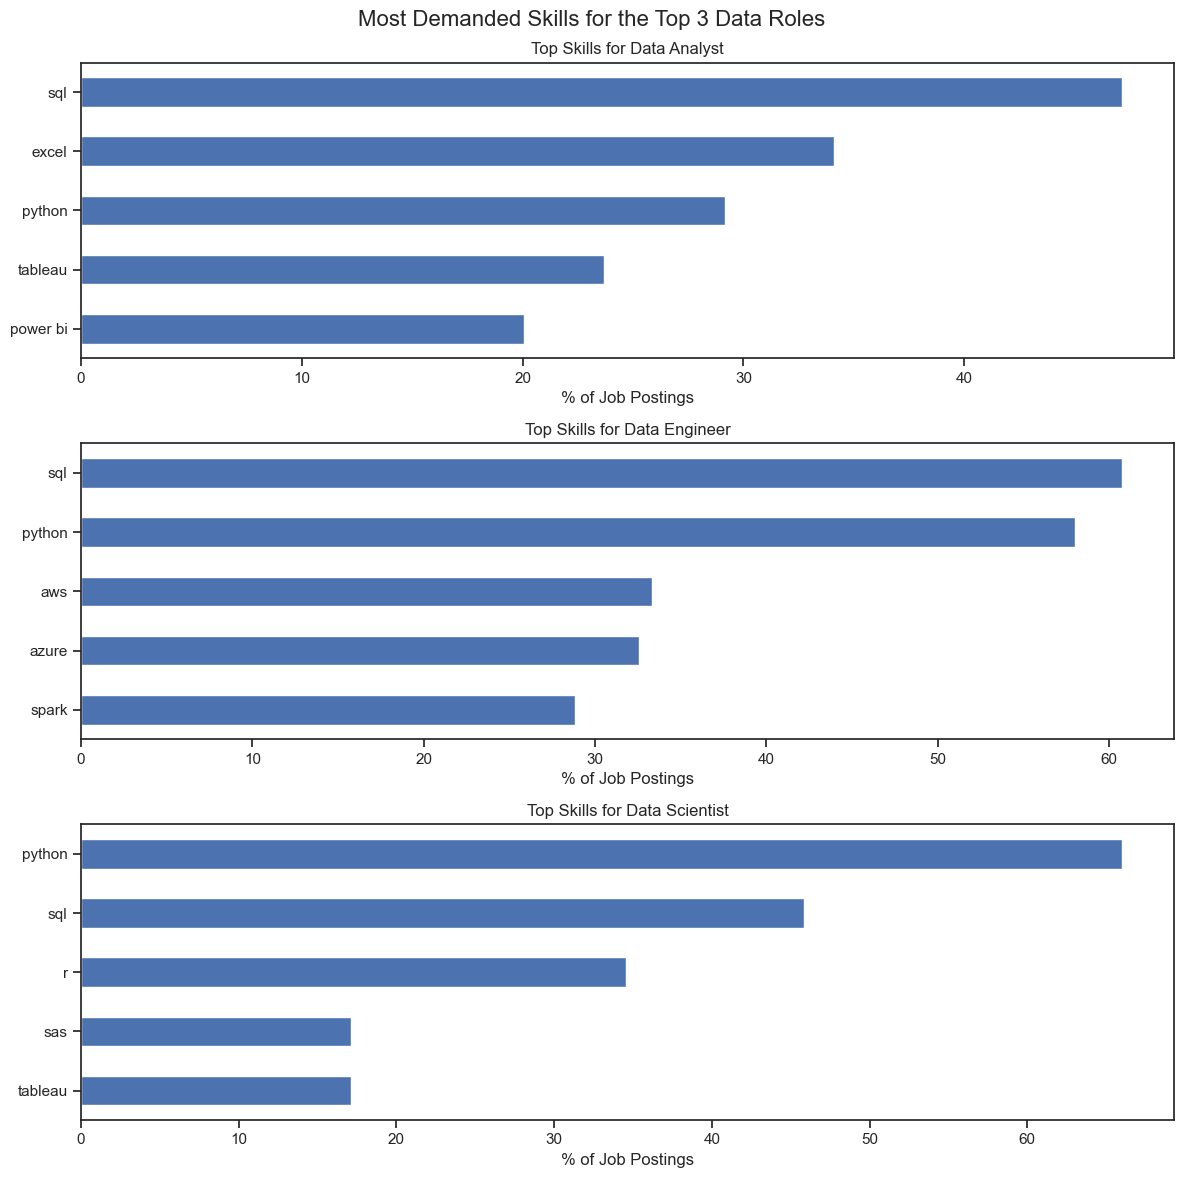

In [ ]:

# Top Skills for Top 3 Data Roles

import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

sns.set_theme(style="ticks")

# 1. Load dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# 2. Clean skills column (string -> list; handle NaNs safely)
def parse_skills(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            return []
    return []

df["job_skills"] = df["job_skills"].apply(parse_skills)

# 3. Explode skills to one skill per row
df_exploded = df.explode("job_skills")
df_exploded = df_exploded[df_exploded["job_skills"].notna() & (df_exploded["job_skills"] != "")]

# 4. Count skills per role
df_skills_count = (
    df_exploded
    .groupby(["job_title_short", "job_skills"])
    .size()
    .reset_index(name="skill_count")
)

# 5. Compute percentages (per role)
job_totals = df.groupby("job_title_short").size()
df_skills_percent = df_skills_count.copy()
df_skills_percent["total_postings"] = df_skills_percent["job_title_short"].map(job_totals)
df_skills_percent["skill_percent"] = (
    df_skills_percent["skill_count"] / df_skills_percent["total_postings"] * 100
)

# 6. Get top 3 most common data roles
job_titles = df["job_title_short"].value_counts().head(3).index.tolist()
print("Top 3 roles:", job_titles)

# 7. Plot top 5 skills (by % of postings) for each role
fig, axes = plt.subplots(len(job_titles), 1, figsize=(12, 4 * len(job_titles)))

# Ensure axes is iterable
if len(job_titles) == 1:
    axes = [axes]

for i, job_title in enumerate(job_titles):
    df_plot = (
        df_skills_percent[df_skills_percent["job_title_short"] == job_title]
        .sort_values("skill_percent", ascending=False)
        .head(5)
    )

    df_plot.plot(
        kind="barh",
        x="job_skills",
        y="skill_percent",
        ax=axes[i],
        title=f"Top Skills for {job_title}",
        legend=False,
    )

    axes[i].invert_yaxis()
    axes[i].set_ylabel("")
    axes[i].set_xlabel("% of Job Postings")

fig.suptitle("Most Demanded Skills for the Top 3 Data Roles", fontsize=16)
fig.tight_layout(h_pad=1.0)
plt.show()


/var/folders/zv/b31nl3b17vg5l0d3gq707z4c0000gn/T/ipykernel_58976/3836801041.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/zv/b31nl3b17vg5l0d3gq707z4c0000gn/T/ipykernel_58976/3836801041.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/zv/b31nl3b17vg5l0d3gq707z4c0000gn/T/ipykernel_58976/3836801041.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


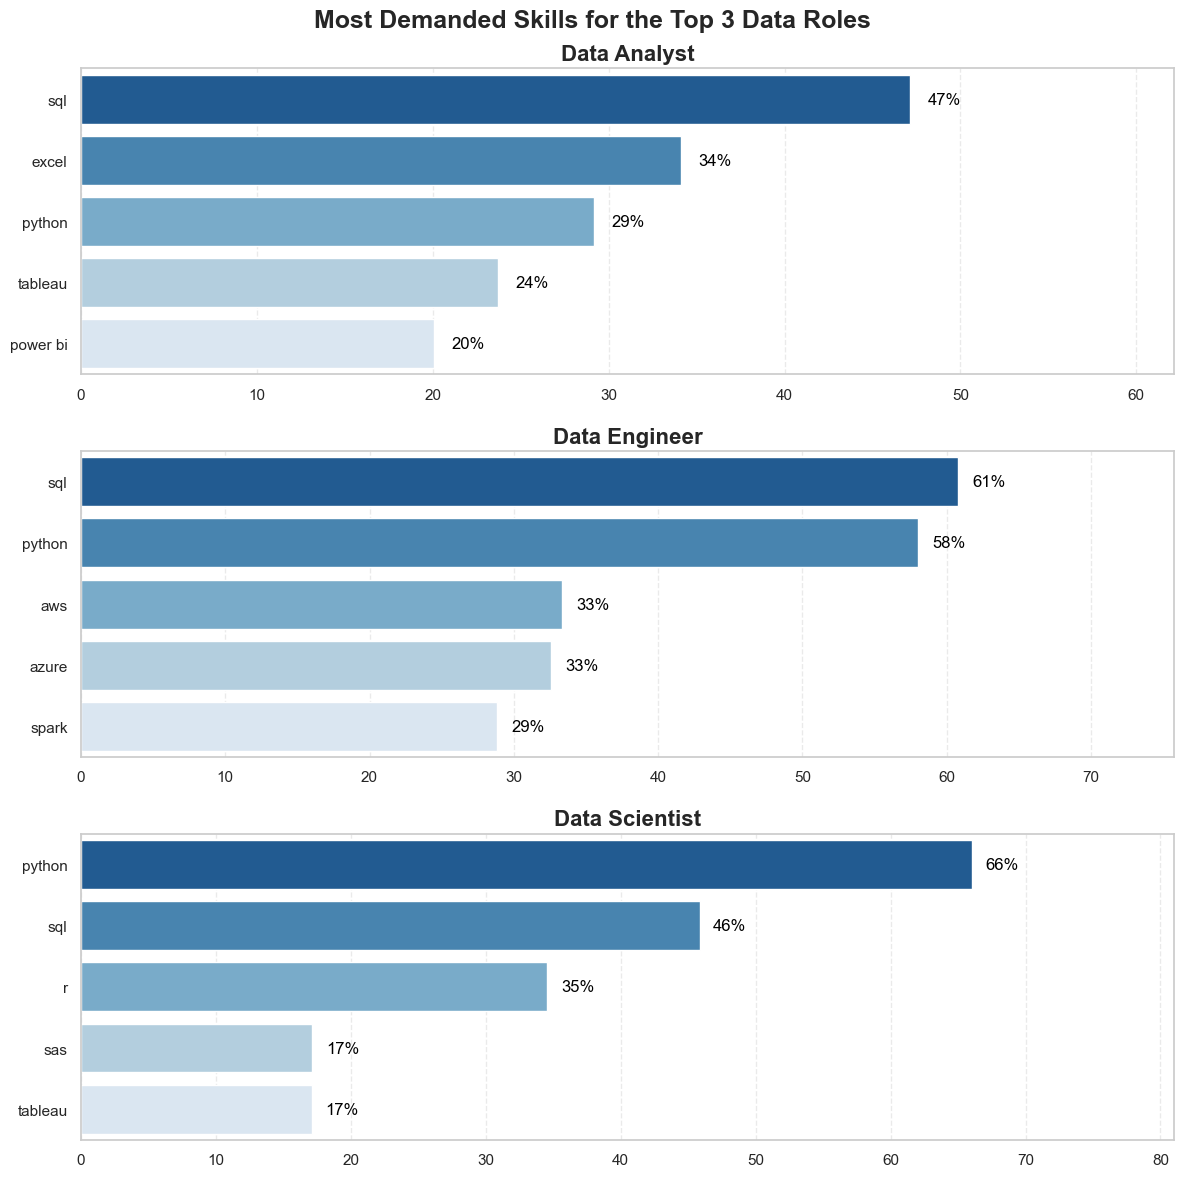

In [6]:
# Seaborn Visualization WITH Percentage Labels


import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

sns.set_theme(style="whitegrid")

# 1. Load dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# 2. Convert job_skills into clean lists
def parse_skills(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    return []

df["job_skills"] = df["job_skills"].apply(parse_skills)

# 3. Expand skills into one row per skill
df_exp = df.explode("job_skills")
df_exp = df_exp[df_exp["job_skills"].notna() & (df_exp["job_skills"] != "")]

# 4. Count skills per job title
df_skills = (
    df_exp.groupby(["job_title_short", "job_skills"])
    .size()
    .reset_index(name="skill_count")
)

# 5. Percentages
job_totals = df.groupby("job_title_short").size()
df_skills["total_postings"] = df_skills["job_title_short"].map(job_totals)
df_skills["skill_percent"] = df_skills["skill_count"] / df_skills["total_postings"] * 100

# 6. Pick top 3 job titles
top_roles = df["job_title_short"].value_counts().head(3).index.tolist()

# 7. Plotting
fig, axes = plt.subplots(len(top_roles), 1, figsize=(12, 4 * len(top_roles)))

if len(top_roles) == 1:
    axes = [axes]

palette = sns.color_palette("Blues_r", 5)

for i, role in enumerate(top_roles):
    df_plot = (
        df_skills[df_skills["job_title_short"] == role]
        .sort_values("skill_percent", ascending=False)
        .head(5)
    )

    # Bar plot
    sns.barplot(
        data=df_plot,
        x="skill_percent",
        y="job_skills",
        ax=axes[i],
        palette=palette
    )

    axes[i].set_title(role, fontsize=16, weight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    # Add percentage labels
    for index, row in df_plot.iterrows():
        axes[i].text(
            row["skill_percent"] + 1,         # position X
            df_plot.index.get_loc(index),     # position Y
            f"{row['skill_percent']:.0f}%",   # label text
            va="center",
            fontsize=12,
            color="black"
        )

    axes[i].set_xlim(0, df_plot["skill_percent"].max() + 15)
    axes[i].grid(axis="x", linestyle="--", alpha=0.4)

fig.suptitle("Most Demanded Skills for the Top 3 Data Roles", fontsize=18, weight="bold")
plt.tight_layout(h_pad=1.5)
plt.show()
